In [61]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [62]:
# Loading the dataset

# import os
# import shutil
# directory = os.path.abspath('my_dir/intro_to_kt')
# if os.path.exists(directory):
#     shutil.rmtree(directory)
# os.makedirs(directory)

df = pd.read_csv('data.csv')

In [63]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [64]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [66]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [67]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [68]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [69]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [70]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [71]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

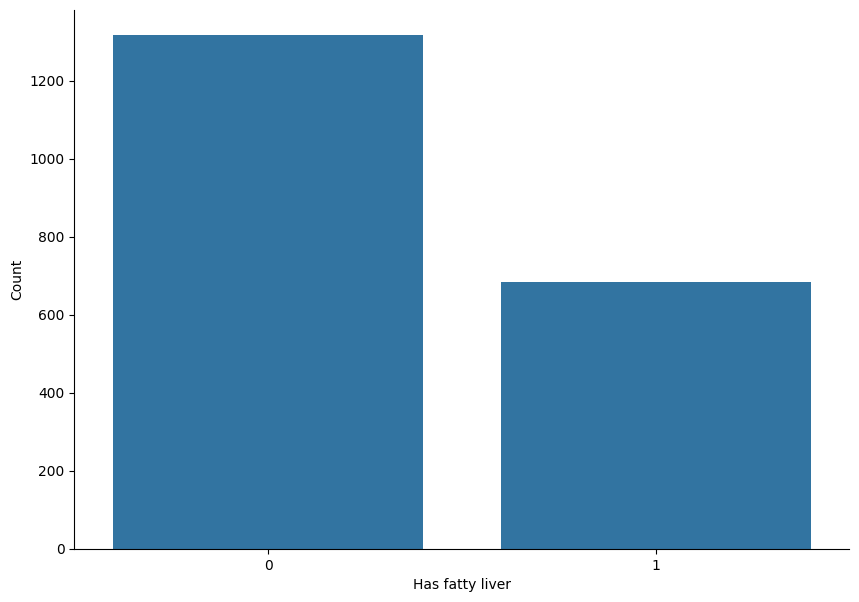

In [72]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has fatty liver')
plt.ylabel('Count')

plt.show()

In [73]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

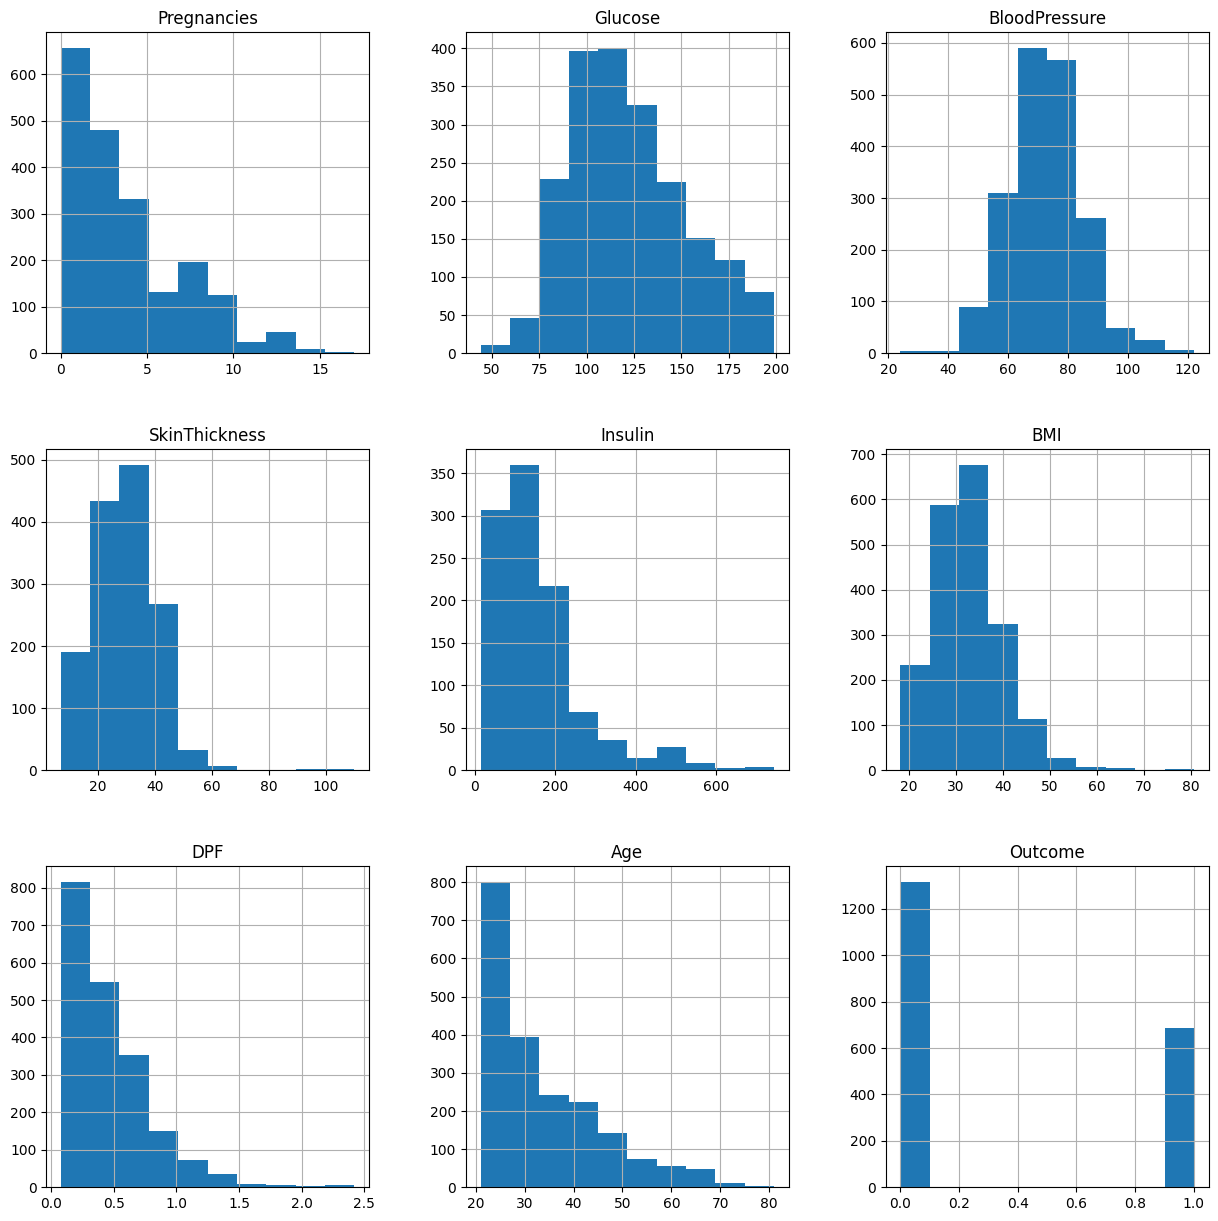

In [74]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [75]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
####################################################################
# fill other nan features with statistical operations to get good results
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)
####################################################################

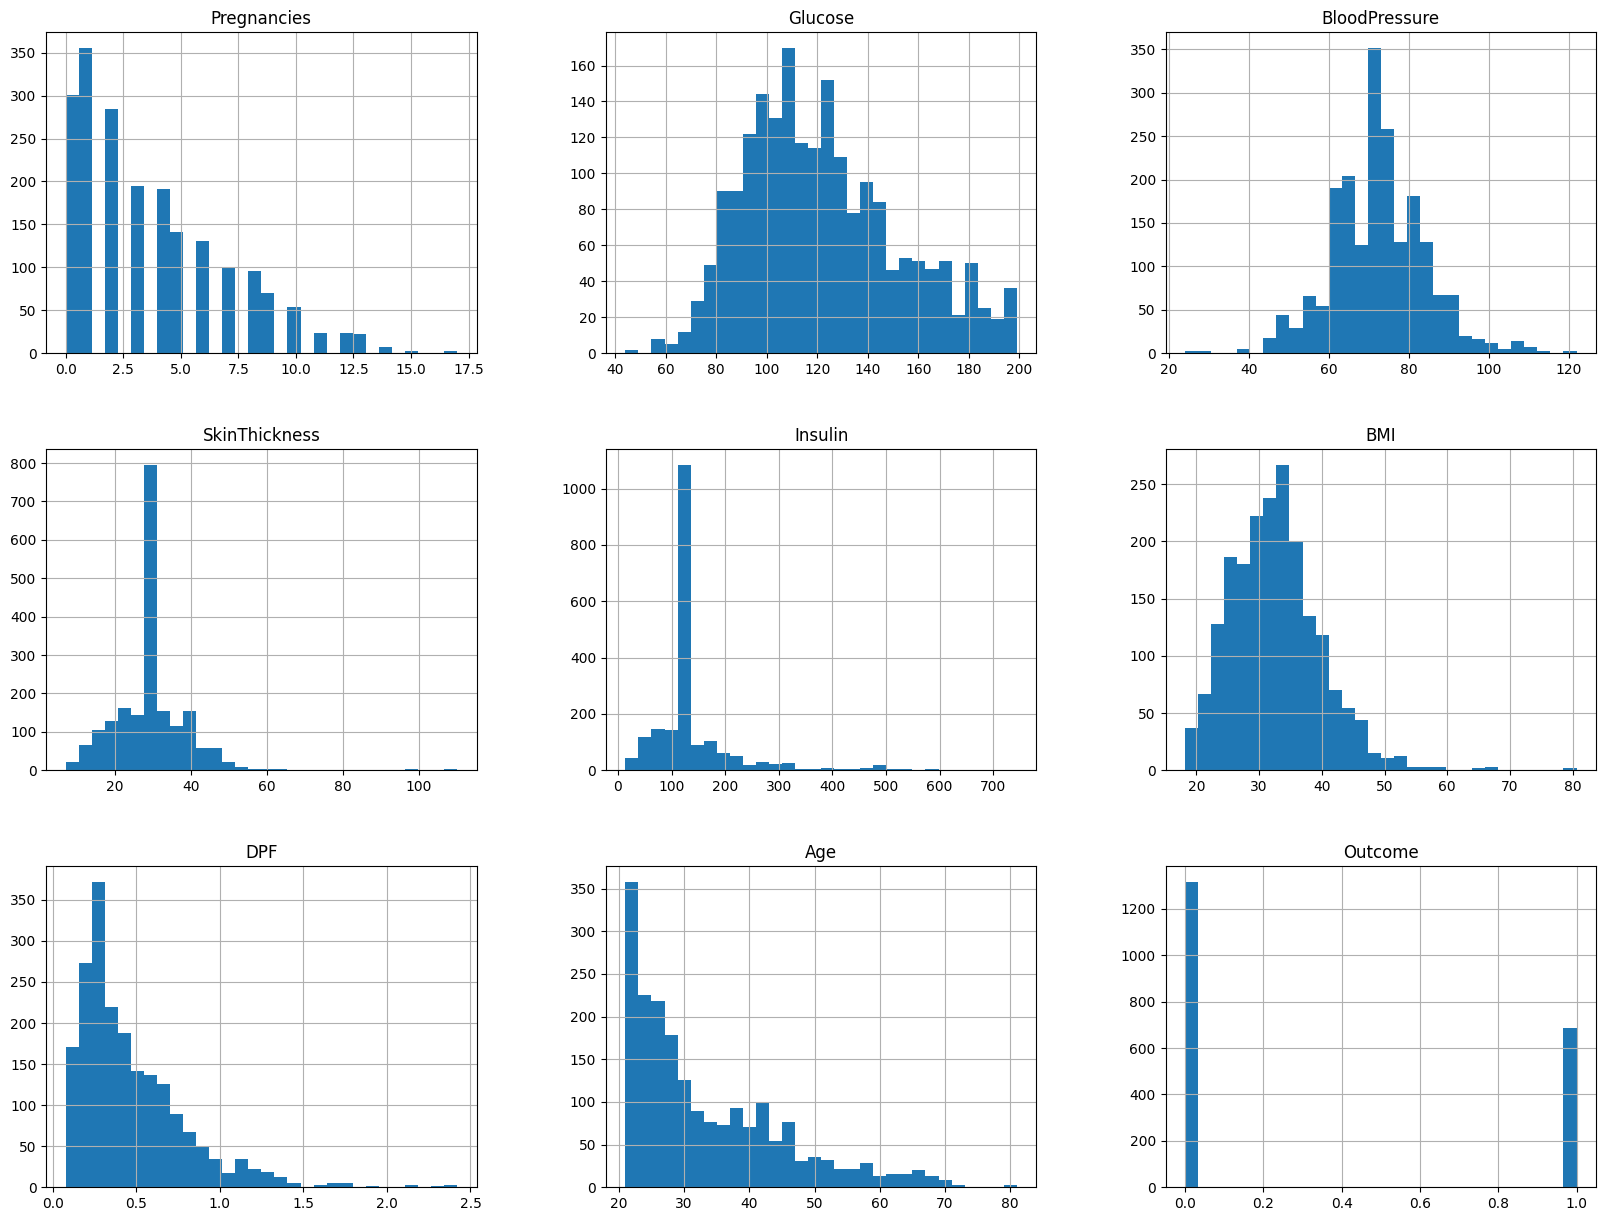

In [76]:
####################################################################
# Plotting histogram of dataset after replacing NaN values
df_copy.hist(bins=30, figsize=(20, 15))
plt.show()
####################################################################

In [77]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [78]:
# split and standard the data in this place
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [79]:
##############################################################
#create nueral network model in kears/tensorflow in this place
##############################################################


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Separate features (X) and labels (y)

X = df.drop(columns=['Outcome'])  #     'Outcome' is the target column
y = df['Outcome']



# Split the data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the data using StandardScaler

#scaler = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Creating a neural network model
def create_model(learning_rate=0.001, dropout_rate=0.5, batch_norm=False):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu'))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Defining the search space for hyperparameters
param_dist = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'model__batch_norm': [False, True],                                                                         # batch_norm: A Boolean parameter indicating whether to use Batch Normalization or not, and is False by default.
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200],
}

# RandomizedSearchCV creat
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# RandomizedSearchCV train
random_search_result = random_search.fit(X_train, y_train)

# Show the best hyperparameters
print("Best parameters found: ", random_search_result.best_params_)

# Using the best parameters to train the final model and get training history
best_params = random_search_result.best_params_

final_model = create_model(
    learning_rate=best_params['model__learning_rate'],
    dropout_rate=best_params['model__dropout_rate'],
    batch_norm=best_params['model__batch_norm']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = final_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters found:  {'model__learning_rate': 0.01, 'model__dropout_rate': 0.3, 'model__batch_norm': False, 'epochs': 100, 'batch_size': 128}
Epoch 1/100


c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5899 - loss: 0.6629 - val_accuracy: 0.7725 - val_loss: 0.4851
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7685 - loss: 0.4959 - val_accuracy: 0.7875 - val_loss: 0.4536
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.4831 - val_accuracy: 0.7700 - val_loss: 0.4640
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7611 - loss: 0.4934 - val_accuracy: 0.7875 - val_loss: 0.4500
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7633 - loss: 0.4581 - val_accuracy: 0.7850 - val_loss: 0.4507
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7679 - loss: 0.4547 - val_accuracy: 0.7850 - val_loss: 0.4387
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7750 - loss: 0.4530 - val_accuracy: 0.8000 - val_loss: 0.4312
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7818 - loss: 0.4366 - val_accuracy: 0.8000 - val_lo

In [ ]:
best_model = final_model

In [102]:
#######################################
# evaluation your model in this place
#######################################


# Prediction on test data
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# محاسبه دقت مدل
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.4f}')

# Calculate the accuracy of the model
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Create a classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print('Classification Report:')
print(report)




Test accuracy: 0.8800
Confusion Matrix:
[[232  21]
 [ 27 120]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91       253
     Class 1       0.85      0.82      0.83       147

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

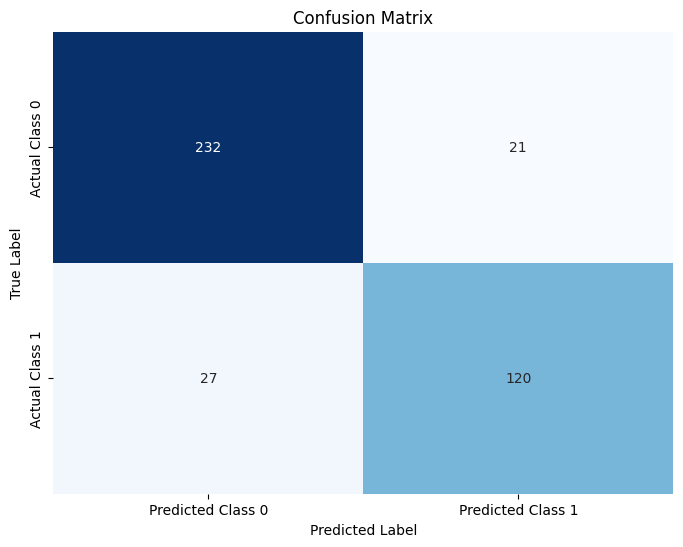

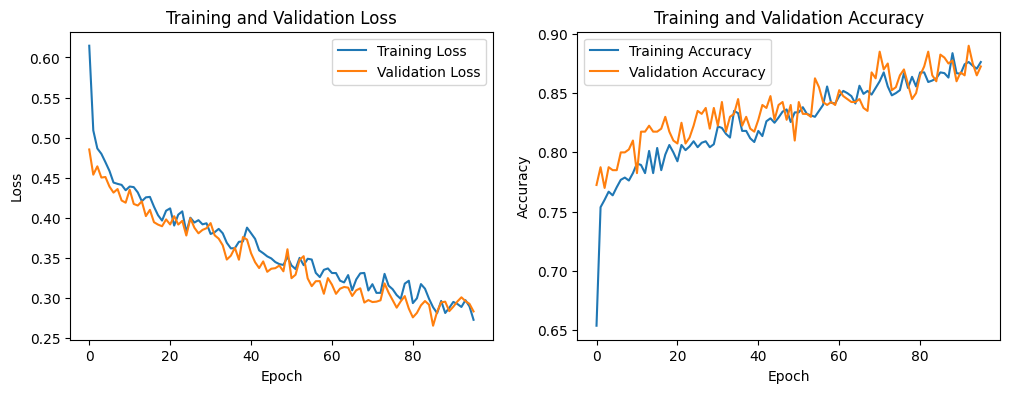

In [81]:
######################################
# Plot training  and accuracy graphs
######################################

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



# Visualize the history of education
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
######################################
# visualize your model in this place
######################################

from tensorflow.keras.utils import plot_model

plot_model(best_model, to_file='model_first_pro_shuffle_Dropout_correction2_.png', show_shapes=True, show_layer_names=True)

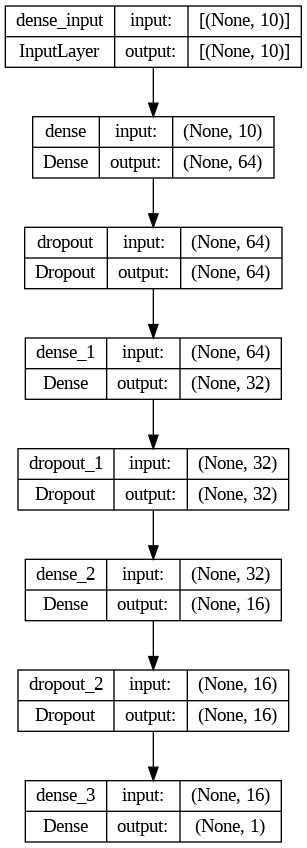

In [86]:
######################################
# create Classification Report in this place
######################################
from sklearn.metrics import classification_report


# Create a classification report
y_pred = random_search_result.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       253
     Class 1       0.90      0.80      0.85       147

    accuracy                           0.90       400
   macro avg       0.90      0.88      0.88       400
weighted avg       0.90      0.90      0.89       400



In [87]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    # cahnge:
    x = sc.transform(x)

    # cahnge
    prediction = model.predict(x)
    return prediction[0][0]

    #return ########################### return  your calssifier

In [90]:
# # Prediction 1 // this sample didnt have fatty liver
# # Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age

# Prediction function
def predict_diabetes(*input_data):
    x = np.array(input_data).reshape(1, -1)
    x = sc.transform(x)
    prediction = random_search_result.predict(x)
    return prediction[0]

# Test predictions
sample = [2, 81, 72, 15, 76, 30.1, 0.547, 25]
sample_2 = [2, 138, 62, 35, 0, 33.6, 0.127, 47]
sample_3 = [0, 84, 82, 31, 125, 38.2, 0.233, 23]

prediction = predict_diabetes(*sample)
prediction_2 = predict_diabetes(*sample_2)
prediction_3 = predict_diabetes(*sample_3)

if prediction > 0.5:
    print('Oops! You have fatty liver.')
else:
    print("Great! You don't have fatty liver.")

if prediction_2 > 0.5:
    print('Oops! You have fatty liver.')
else:
    print("Great! You don't have fatty liver.")

if prediction_3 > 0.5:
    print('Oops! You have fatty liver.')
else:
    print("Great! You don't have fatty liver.")

c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Great! You don't have fatty liver.
Oops! You have fatty liver.
Great! You don't have fatty liver.


c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
